## Tensor

In [1]:
import torch
import pandas as pd

Construct a tensor directly from data

Construct a matrix filled zeros

In [2]:
x = torch.zeros(6, 4, dtype=torch.float)
print(x)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


Construct a randomly initialized matrix

In [3]:
x = torch.rand(6, 4)
print(x)

tensor([[0.0564, 0.9220, 0.6229, 0.4352],
        [0.5873, 0.6987, 0.3798, 0.3062],
        [0.5094, 0.8976, 0.3459, 0.8352],
        [0.7237, 0.3805, 0.9817, 0.9611],
        [0.5677, 0.8343, 0.5330, 0.2474],
        [0.4255, 0.4345, 0.9386, 0.9180]])


Basic operation: addition

In [4]:
y = torch.rand(6, 4)
print(x)
print(y)
print(x + y)

tensor([[0.0564, 0.9220, 0.6229, 0.4352],
        [0.5873, 0.6987, 0.3798, 0.3062],
        [0.5094, 0.8976, 0.3459, 0.8352],
        [0.7237, 0.3805, 0.9817, 0.9611],
        [0.5677, 0.8343, 0.5330, 0.2474],
        [0.4255, 0.4345, 0.9386, 0.9180]])
tensor([[0.1196, 0.6094, 0.6338, 0.0409],
        [0.1557, 0.1686, 0.9860, 0.6135],
        [0.2968, 0.1926, 0.0322, 0.5521],
        [0.3445, 0.2483, 0.3713, 0.7447],
        [0.2444, 0.9603, 0.0998, 0.1552],
        [0.0440, 0.1337, 0.0708, 0.4187]])
tensor([[0.1760, 1.5314, 1.2567, 0.4761],
        [0.7430, 0.8673, 1.3658, 0.9197],
        [0.8062, 1.0902, 0.3780, 1.3873],
        [1.0683, 0.6287, 1.3530, 1.7058],
        [0.8121, 1.7946, 0.6327, 0.4026],
        [0.4696, 0.5682, 1.0094, 1.3367]])


## Neural Net

In [5]:
import torch.nn as nn
import torch.nn.functional as F

In [65]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
import cv2

In [68]:
frame = pd.read_csv('namesPer10.csv')
#frame.head(10000)
img_name = frame.iloc[1, 0]
print('Image name: {}'.format(img_name))
#type(frame.iloc[1,0])
type(frame.iloc[1,0][0])

Image name: A1016.jpg


str

In [73]:
plt.ion
plt.figure()

'''
for i in range(0, 7799):
    str = frame.iloc[i,0]
    if str[0] == "A":
        imread(os.path.join("asl_alphabet_train/A/",str))
        plt.pause(.1)
        '''
#plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')

path = "asl_alphabet_train/A/A1016.jpg"
img = Image.open(path)
arr = np.array(img)
print(arr[0,10])


[  0   3 255]


<Figure size 432x288 with 0 Axes>

Below defines our neural net structure (important)

In [40]:
# Our neural net structure:
# input_tensor -> linear_layer_1 -> activation_func_1 -> linear_layer_2 -> activation_func_2 -> linear_layer_3 -> output_tensor

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.L1 = nn.Linear(3*32*32, 120) # 3*32*32 is the size of a picture's input matrix
        self.F1 = F.relu
        self.L2 = nn.Linear(120, 84)
        self.F2 = F.relu
        self.L3 = nn.Linear(84, 10)

    def forward(self, x):
        x = x.view(-1, 3*32*32) # sequentialize a picture's input matrix to a tensor
        L1_out = self.L1(x)
        F1_out = self.F1(L1_out)
        L2_out = self.L2(F1_out)
        F2_out = self.F2(L2_out)
        L3_out = self.L3(F2_out)
        y = L3_out
        return y
    
net = Net()

## Load a sample dataset

Load CIFAR-10 dataset (not important)

In [8]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

train_dataiter = iter(trainloader)
test_dataiter = iter(testloader)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 frog   car   car   dog


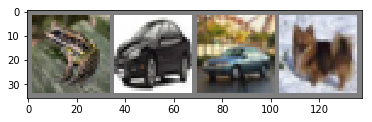

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
images, labels = train_dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Train our model

Loss function and optimization algorithm (important but skippable)

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Start training

In [11]:
for epoch in range(2): # loop over the dataset multiple times, use larger number if time allows

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.923
[1,  4000] loss: 1.722
[1,  6000] loss: 1.668
[1,  8000] loss: 1.613
[1, 10000] loss: 1.575
[1, 12000] loss: 1.582
[2,  2000] loss: 1.487
[2,  4000] loss: 1.485
[2,  6000] loss: 1.474
[2,  8000] loss: 1.464
[2, 10000] loss: 1.445
[2, 12000] loss: 1.465
Finished Training


## Result

Ground truth

GroundTruth:    dog horse truck  ship


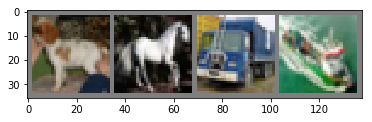

In [18]:
images, labels = test_dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Our prediction

In [19]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   frog horse truck  ship


## Resources

https://pytorch.org/docs/stable/nn.html

## Things to try
1. Find out the accuracy of our model
2. Add more layers to our neural net and see if it improves the performance
3. Check the above link to learn about more advanced layers than nn.Linear